# Задача понижения размерности
## Отбор признаков (feature selection)

## Задача регрессии
Числовые данные используются в качестве признаков и целевой переменной

### Отбор на основе коэффициента корреляции Пирсона

Импорт из библиотеки sklearn инструментов для генерации данных и отбора признаков

In [1]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

### Учебный набор данных

Зададим следующие значения параметров: размер выборки = 1000, число признаков = 10, из них информативных всего 3. Следовательно, после отбора именно столько признаков должно остаться

In [2]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=3)

print(X.shape, y.shape)

(1000, 10) (1000,)


Отбор признаков на основе корреляционных зависимостей

In [3]:
fs = SelectKBest(score_func=f_regression, k=3)

X_selected = fs.fit_transform(X, y)

print(X_selected.shape)

(1000, 3)


Вычислим коэффициенты попарной корреляции для признаков

In [6]:
import pandas as pd
df = pd.DataFrame(X)
df_corr = df.corr()
df_corr

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.015549,-0.016976,0.007970,-0.035479,-0.061965,0.013465,0.035662,-0.079227,0.003549
1,0.015549,1.000000,-0.019520,0.023102,-0.008574,-0.002261,0.014132,-0.072770,0.021873,0.009400
2,-0.016976,-0.019520,1.000000,-0.013162,-0.050608,0.018003,-0.008854,-0.052712,-0.037323,-0.003811
3,0.007970,0.023102,-0.013162,1.000000,0.040633,0.013523,-0.023538,-0.034024,0.008158,0.059391
4,-0.035479,-0.008574,-0.050608,0.040633,1.000000,-0.035034,-0.050669,0.010115,-0.016805,-0.083998
5,-0.061965,-0.002261,0.018003,0.013523,-0.035034,1.000000,0.015905,-0.063186,0.014437,-0.022689
6,0.013465,0.014132,-0.008854,-0.023538,-0.050669,0.015905,1.000000,0.033703,0.005989,0.008748
7,0.035662,-0.072770,-0.052712,-0.034024,0.010115,-0.063186,0.033703,1.000000,-0.023734,-0.012091
8,-0.079227,0.021873,-0.037323,0.008158,-0.016805,0.014437,0.005989,-0.023734,1.000000,-0.002359
9,0.003549,0.009400,-0.003811,0.059391,-0.083998,-0.022689,0.008748,-0.012091,-0.002359,1.000000


Улучшим визуализацию

<Axes: >

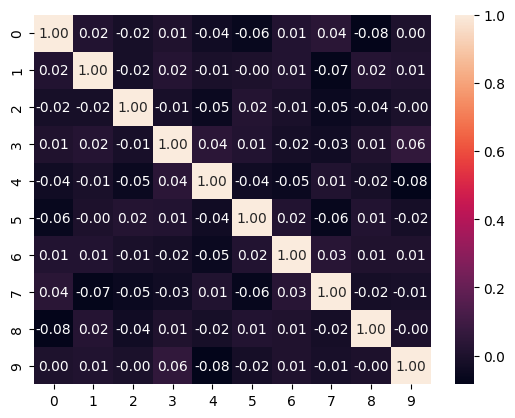

In [7]:
import seaborn as sns
sns.heatmap (df_corr, annot=df_corr, fmt='.2f')

Признаки независимы. Теперь оценим зависимость между признаками и целевой переменной - у.

In [11]:
dy = pd.Series(y)
Xy_corr = df.corrwith(dy)
Xy_corr

,0
0,-0.097866
1,0.017109
2,0.081422
3,0.011135
4,-0.034099
5,0.390716
6,0.010507
7,-0.051262
8,0.919600
9,-0.011101


Коэффициенты для некоторых признаков явно больше других. Среди них есть 3 информативных признака.

Можно автоматизировать вывод информативных признаков без анализа конкретных знавений. Достаточно проверить дополнительно с помощью метода get_support() - он возвращает True для признаков, отобранных методом SelectKBest.

In [9]:
print(fs.get_support())

[ True False False False False  True False False  True False]


Еще два атрибута показывают значения статистики ANOVA и уровень значимости для всех признаков - можно сравнить и информативные между собой

In [12]:
print(fs.scores_)

[9.65109265e+00 2.92223783e-01 6.66037172e+00 1.23753836e-01
 1.16178401e+00 1.79801567e+02 1.10186440e-01 2.62941713e+00
 5.46841849e+03 1.23004301e-01]


In [13]:
print(fs.pvalues_)

[1.94585922e-03 5.88919610e-01 9.99985580e-03 7.25072545e-01
 2.81356314e-01 8.11288906e-38 7.40001675e-01 1.05216077e-01
 0.00000000e+00 7.25872668e-01]


## Задача классификации

Числовые значения признаков, номинальные значения целевой переменной (метки классов)

Аналогичный отбор на основе дисперсионного анализа на учебном наборе данных

In [15]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import f_classif

X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_classes=2)

fs = SelectKBest(score_func=f_classif, k=2)
X_selected = fs.fit_transform(X, y)

print(X_selected.shape)
print(fs.get_support())

(100, 2)
[False False False  True False  True False False False False False False
 False False False False False False False False]
